<a href="https://colab.research.google.com/github/AnkitPatel745/OpenCV-Project-Pencil-Sketch-and-Cartoon-Paint-/blob/main/OpenCV_Starter_Project_(Pencil_Sketch_and_Cartoon_Paint)_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # Finding the Path Of the File
# import os
# os.getcwd()

In [2]:
# Intalling the opencv library
!pip install opencv-python

In [3]:
# Importing the Library  
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as matim
import ipywidgets as widgets

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


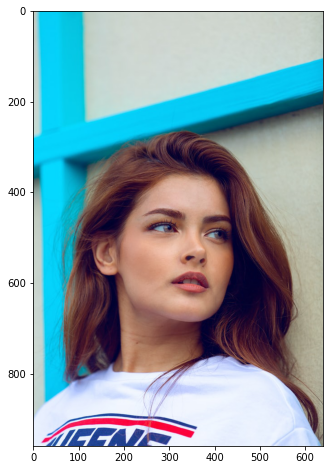

In [9]:
# Importing the image from directory
img = matim.imread('/content/drive/MyDrive/Data Science Project(Self)/OpenCV/OpenCV Project/images/g2.jpg')
plt.figure(figsize=(15,8))
plt.imshow(img)

plt.show()

### Preserving Filters

In [11]:
# creating the image of orignal and the filter image 
@widgets.interact_manual(s=(0,200,1),r=(0,1,0.1))
def edgePreserve(s=50,r=0.5):
    edgeImg = cv2.edgePreservingFilter(img, sigma_s=s, sigma_r=r)
    plt.figure(figsize=(18,8))
    plt.subplot(1,2,1)
    plt.title('Original Img')
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.title('Filtered Img')
    plt.imshow(edgeImg)
    plt.show()

interactive(children=(IntSlider(value=50, description='s', max=200), FloatSlider(value=0.5, description='r', m…

In [12]:
@widgets.interact_manual(s=(1,200,1),r=(0,1,0.1))
def detail(s=20,r=0.2):
    detailImg = cv2.detailEnhance(img, sigma_s=s, sigma_r=r)
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.title("Original Image")
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.title("Filtered Image")
    plt.imshow(detailImg)
    plt.show()

interactive(children=(IntSlider(value=20, description='s', max=200, min=1), FloatSlider(value=0.2, description…